In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Author: Anushka Pandey**

## **GRIP JUNE22 @ THE SPARKS FOUNDATION**

### Data Science and Business Analytics Task 7: Stock Market Prediction using Numerical and Textual Analysis

# Stock Price Analysis

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

import math

### Importing historical stock data

In [4]:
stock_price_data =pd.read_csv('/content/drive/MyDrive/Sparks_Foundation/SENSEX.csv')
stock_price_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-01,26.010000,26.379999,25.860001,25.900000,24.324486,55900
1,2017-03-02,25.830000,25.920000,25.660000,25.770000,24.202393,41800
2,2017-03-03,25.780001,26.070000,25.459999,25.780001,24.211786,70400
3,2017-03-06,25.680000,25.889999,25.440001,25.830000,24.258745,42600
4,2017-03-07,25.700001,25.879999,25.549999,25.840000,24.268139,45600


In [5]:
stock_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


### Visualizing the stock data

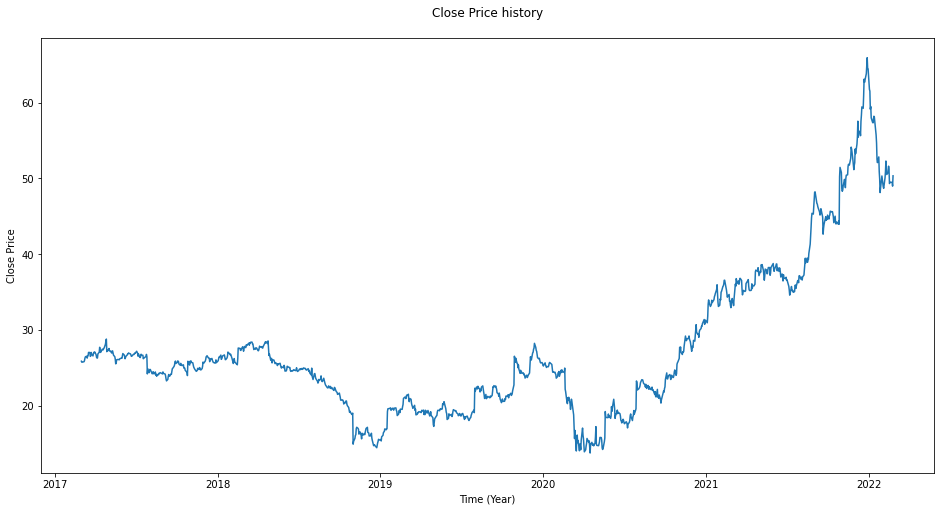

In [6]:
stock_price_data['Date'] = pd.to_datetime(stock_price_data.Date,format='%Y-%m-%d')
stock_price_data.index = stock_price_data['Date']
stock_price_data.dropna(inplace=True)

plt.figure(figsize=(16,8))
plt.title('Close Price history\n')
plt.xlabel('Time (Year)')
plt.ylabel('Close Price')
plt.plot(stock_price_data['Close'])


In [7]:
np.random.seed(10)

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Sparks_Foundation/SENSEX.csv', usecols=[5], engine='python')
df.dropna(inplace=True)
df = df.values
df = df.astype('float32')

### Standardizing the dataframe

In [10]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

# split into train and test sets 
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]

In [11]:
len(df)

1258

In [12]:
len(train)

1006

In [13]:
train.shape

(1006, 1)

### Creating a Data Sructures with 120 timesteps and 1 outputs

In [15]:
xtrain = []
ytrain = []
for i in range(120,1006):
  xtrain.append(train[i-120:i,0])
  ytrain.append(train[i,0])
xtrain,ytrain= np.array(xtrain) , np.array(ytrain)

In [16]:
xtrain.shape

(886, 120)

### Reshaping the data from 2d array to 3d array:

In [17]:
xtrain = np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [18]:
xtrain.shape

(886, 120, 1)

## Building the Recurrent Neural Networks:

### RNN model with 4 hidden layers , each having 100 neurons

In [19]:
model=Sequential()

model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.1))

model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))


model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))

model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

In [20]:
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(xtrain, ytrain, validation_split=0.2, epochs=50, batch_size=20, verbose=2)

# compiling and fitting the model
model.compile(loss='mse' , optimizer='adam')
model.fit(xtrain, ytrain, validation_split=0.2, epochs=10, batch_size=8, verbose=1)


Epoch 1/10
89/89 [==============================] - 42s 375ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 2/10
89/89 [==============================] - 30s 332ms/step - loss: 8.1888e-04 - val_loss: 0.0011
Epoch 3/10
89/89 [==============================] - 28s 312ms/step - loss: 6.4112e-04 - val_loss: 9.0318e-04
Epoch 4/10
89/89 [==============================] - 28s 313ms/step - loss: 6.0954e-04 - val_loss: 5.4950e-04
Epoch 5/10
89/89 [==============================] - 28s 314ms/step - loss: 5.7603e-04 - val_loss: 5.1992e-04
Epoch 6/10
89/89 [==============================] - 29s 324ms/step - loss: 5.0439e-04 - val_loss: 7.4701e-04
Epoch 7/10
89/89 [==============================] - 28s 314ms/step - loss: 4.5251e-04 - val_loss: 5.0366e-04
Epoch 8/10
89/89 [==============================] - 28s 320ms/step - loss: 3.7966e-04 - val_loss: 6.1718e-04
Epoch 9/10
89/89 [==============================] - 28s 314ms/step - loss: 3.6542e-04 - val_loss: 9.1847e-04
Epoch 10/10
89/89 [============

## Making predictions

### Creating the input in the proper format

In [21]:
inputs = df[len(df)-len(test)-120:]
inputs.reshape(-1,1)
# inputs = scaler.transform(inputs)

array([[0.15932792],
       [0.14747861],
       [0.15462577],
       [0.14315271],
       [0.14127192],
       [0.16008031],
       [0.1408957 ],
       [0.14428124],
       [0.13807449],
       [0.14635015],
       [0.1354413 ],
       [0.12603706],
       [0.13412467],
       [0.1386387 ],
       [0.14352885],
       [0.1563186 ],
       [0.1531212 ],
       [0.16233727],
       [0.16609895],
       [0.18471926],
       [0.2008945 ],
       [0.18622395],
       [0.1860359 ],
       [0.19017369],
       [0.19412348],
       [0.19694474],
       [0.19111416],
       [0.18453124],
       [0.19130224],
       [0.19506392],
       [0.18942139],
       [0.18979758],
       [0.19468775],
       [0.20352766],
       [0.20822978],
       [0.19487584],
       [0.19901371],
       [0.22233605],
       [0.22609776],
       [0.22816664],
       [0.23681855],
       [0.26446685],
       [0.25713155],
       [0.26521918],
       [0.2533271 ],
       [0.24841926],
       [0.25502595],
       [0.253

In [22]:
len(inputs)

372

In [23]:
X_test = []
for i in range(120,372):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)

In [24]:
X_test.shape

(252, 120)

### Prediction

In [25]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

### Real stock price vs Prediction of stock price for last 850 days


<function matplotlib.pyplot.show>

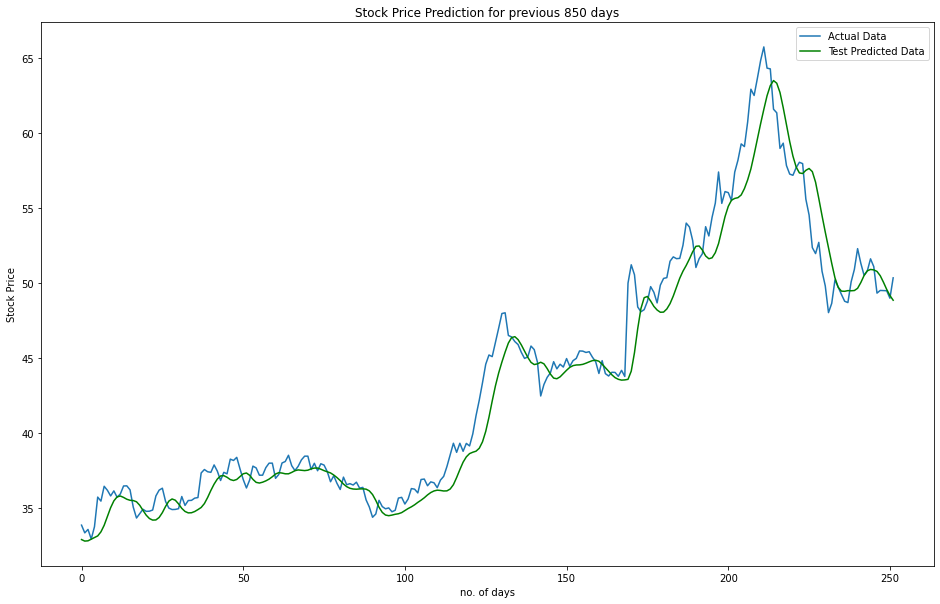

In [26]:
plt.figure(figsize=(16,10))
plt.plot(scaler.inverse_transform(df[len(df)-len(test):,:]), label = 'Actual Data')
plt.title('Stock Price Prediction for previous 850 days')
plt.xlabel('no. of days')
plt.ylabel('Stock Price')
plt.plot(predicted_stock_price, color='green', label = 'Test Predicted Data')

plt.legend(loc='best')
plt.show

# Textual Data(News Headlines) Analysis

## Importing the Dataset

In [27]:
from textblob import TextBlob
from datetime import datetime

In [29]:
data = pd.read_csv('/content/drive/MyDrive/Sparks_Foundation/india-news-headlines.csv')
data.head()


,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [30]:
data.tail()

,publish_date,headline_category,headline_text
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...
3650969,20220331,city.salem,Tamil Nadu sees marginal rise of Covid cases w...


## Data Preprocessing

In [31]:
data['publish_date'].duplicated()

0          False
1           True
2           True
3           True
4           True
           ...  
3650965     True
3650966     True
3650967     True
3650968     True
3650969     True
Name: publish_date, Length: 3650970, dtype: bool

### Removing duplicates

In [32]:
data = data.drop_duplicates('publish_date', keep='first').sort_index()
data= data.reset_index()

In [33]:
data.rename(columns={'publish_date': 'Date'},inplace = True)
data.head()

,index,Date,headline_category,headline_text
0,0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,86,20010103,unknown,Powerless north India gropes in the dark
2,127,20010104,unknown,The string that pulled Stephen Hawking to India
3,280,20010105,unknown,Light combat craft takes India into club class
4,406,20010106,unknown,Light combat craft takes India into club class


### Converting the column 'Date' to type 'datetime'

In [34]:
# dropping duplicates
data = data.drop_duplicates()

# coverting the column 'Date' to type 'datetime'
data['Date'] = data['Date'].astype(str)
data['Date'] = data['Date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 7716
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              7717 non-null   int64         
 1   Date               7717 non-null   datetime64[ns]
 2   headline_category  7717 non-null   object        
 3   headline_text      7717 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 301.4+ KB


In [36]:
data['headline_category'].value_counts()

unknown                                  987
entertainment.hindi.bollywood            732
india                                    343
life-style.relationships.man-woman       332
edit-page                                256
                                        ... 
shobhaa-de.politically-incorrect           1
city.jammu                                 1
friendship-day                             1
entertainment.marathi.movies.previews      1
astrology.horoscope.yearly                 1
Name: headline_category, Length: 330, dtype: int64

## Representing number of headline text (News Headline) per city
 

In [37]:
city_data = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
city_data

,index,Date,headline_category,headline_text
8,642,2001-01-10,city.patna,Fend for yourselves; Pande tells doctors
48,2215,2001-03-09,city.delhi,Maneka asks govt to take back land for cow she...
114,4563,2001-05-22,city.pune,She turned and fought
116,4693,2001-05-27,city.bengaluru,Need to boost exports; says bank head
118,4917,2001-05-29,city.bengaluru,US visit won't be piece of cake for Krishna
...,...,...,...,...
7700,3642496,2022-03-15,city.mumbai,Mumbaikars enjoy nightlife once more as restau...
7703,3643993,2022-03-18,city.mumbai,Mumbai salons and spas deal with heavy demand ...
7707,3645983,2022-03-22,city.patna,Sikta MLA pleads for police reform
7710,3647476,2022-03-25,city.delhi,Speeding up; shortcuts and tackling unruly cus...


In [38]:
city_split = pd.DataFrame(columns=['city_name'])

In [39]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]


In [40]:
city_data = pd.concat([city_data,city_split],axis=1)

In [41]:
city_data.drop(columns=['headline_category'],axis=1, inplace=True)

In [42]:
city_data.head()

,index,Date,headline_text,city_name
8,642,2001-01-10,Fend for yourselves; Pande tells doctors,patna
48,2215,2001-03-09,Maneka asks govt to take back land for cow she...,delhi
114,4563,2001-05-22,She turned and fought,pune
116,4693,2001-05-27,Need to boost exports; says bank head,bengaluru
118,4917,2001-05-29,US visit won't be piece of cake for Krishna,bengaluru


In [43]:
city_data.drop(['index'],axis=1)

,Date,headline_text,city_name
8,2001-01-10,Fend for yourselves; Pande tells doctors,patna
48,2001-03-09,Maneka asks govt to take back land for cow she...,delhi
114,2001-05-22,She turned and fought,pune
116,2001-05-27,Need to boost exports; says bank head,bengaluru
118,2001-05-29,US visit won't be piece of cake for Krishna,bengaluru
...,...,...,...
7700,2022-03-15,Mumbaikars enjoy nightlife once more as restau...,mumbai
7703,2022-03-18,Mumbai salons and spas deal with heavy demand ...,mumbai
7707,2022-03-22,Sikta MLA pleads for police reform,patna
7710,2022-03-25,Speeding up; shortcuts and tackling unruly cus...,delhi


In [44]:
city_data.city_name.unique()


array(['patna', 'delhi', 'pune', 'bengaluru', 'ahmedabad', 'mumbai',
       'thiruvananthapuram', 'kolkata', 'hyderabad', 'lucknow',
       'chandigarh', 'goa', 'nagpur', 'guwahati', 'rajkot', 'bhubaneswar',
       'surat', 'allahabad', 'varanasi', 'vadodara', 'mangaluru',
       'ranchi', 'jaipur', 'ludhiana', 'mysuru', 'kanpur', 'thane',
       'hubballi', 'kochi', 'navimumbai', 'gurgaon', 'indore', 'kolhapur',
       'agartala', 'madurai', 'bareilly', 'aurangabad', 'meerut',
       'visakhapatnam', 'trichy', 'coimbatore', 'jammu', 'dehradun',
       'nashik', 'noida', 'puducherry', 'erode', 'chennai', 'jind',
       'ghaziabad', 'bhopal', 'jamshedpur', 'vijayawada', 'agra',
       'shimla', 'amritsar'], dtype=object)

In [45]:
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})


In [46]:
city_headline.rename(columns={'headline_text':'Number_of_headline_text'},inplace=True)


## Top 20 cities which have high number of headlines texts

In [47]:
city_headline = city_headline.sort_values(by='Number_of_headline_text',ascending=False)
top_20_headline_city = city_headline.head(20)
top_20_headline_city

,Number_of_headline_text
city_name,
bengaluru,113
mumbai,94
delhi,84
ahmedabad,83
pune,78
hyderabad,75
patna,73
chandigarh,59
goa,57


## Visualising the top 20 cities with highest no.of headlines

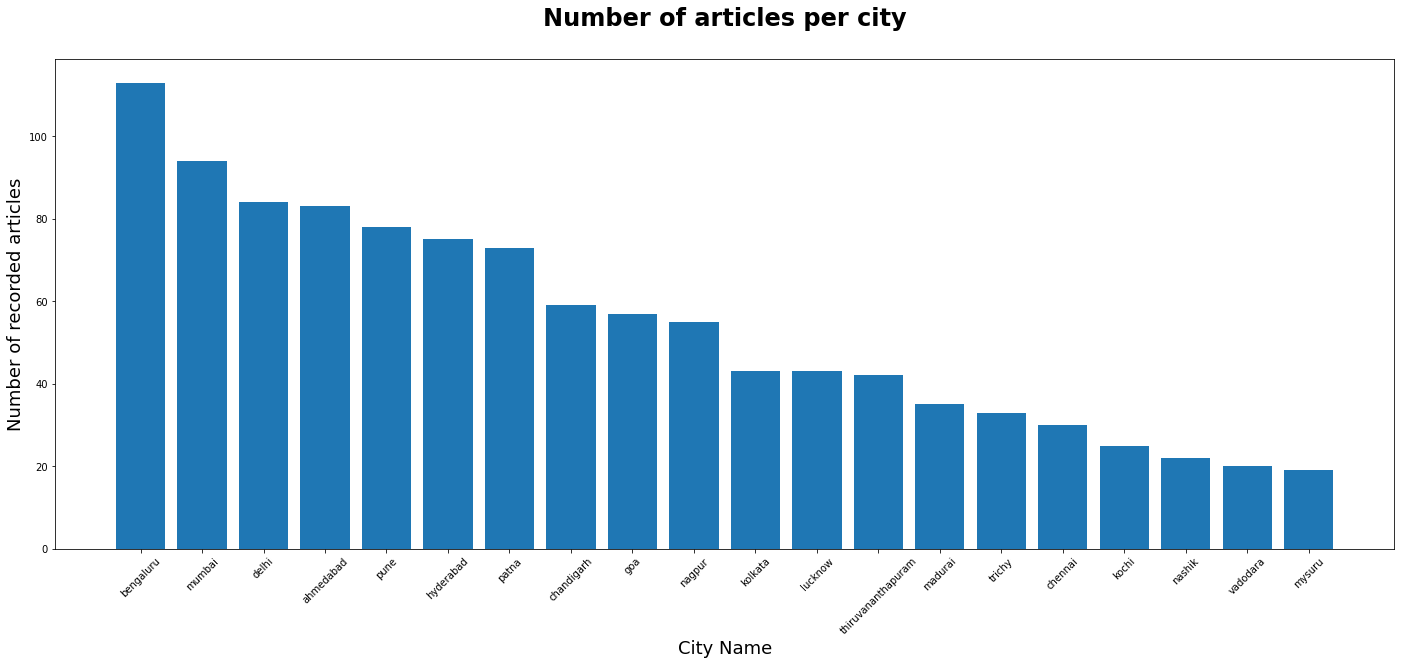

In [48]:
plt.figure(figsize=(24,9))
plt.bar(top_20_headline_city.index,height=top_20_headline_city['Number_of_headline_text'])
plt.xticks(rotation = 45)
plt.xlabel('City Name',fontsize=18)
plt.ylabel('Number of recorded articles',fontsize=18)
plt.title('Number of articles per city\n',fontsize=24, fontweight='bold')
plt.show()


# Representing Number of News Headlines per year and per city

In [49]:
city_data.rename(columns={'publish_date': 'Date'},inplace = True)
city_data.head()


,index,Date,headline_text,city_name
8,642,2001-01-10,Fend for yourselves; Pande tells doctors,patna
48,2215,2001-03-09,Maneka asks govt to take back land for cow she...,delhi
114,4563,2001-05-22,She turned and fought,pune
116,4693,2001-05-27,Need to boost exports; says bank head,bengaluru
118,4917,2001-05-29,US visit won't be piece of cake for Krishna,bengaluru


In [50]:
city_data['Date'] = pd.to_datetime(city_data['Date'])
city_data.head()

,index,Date,headline_text,city_name
8,642,2001-01-10,Fend for yourselves; Pande tells doctors,patna
48,2215,2001-03-09,Maneka asks govt to take back land for cow she...,delhi
114,4563,2001-05-22,She turned and fought,pune
116,4693,2001-05-27,Need to boost exports; says bank head,bengaluru
118,4917,2001-05-29,US visit won't be piece of cake for Krishna,bengaluru


In [51]:
city_data['Year'] = city_data['Date'].apply(lambda x: (x.year))

In [52]:
city_data.drop(columns=['Date','index'],axis=1,inplace=True)
city_data.head()

,headline_text,city_name,Year
8,Fend for yourselves; Pande tells doctors,patna,2001
48,Maneka asks govt to take back land for cow she...,delhi,2001
114,She turned and fought,pune,2001
116,Need to boost exports; says bank head,bengaluru,2001
118,US visit won't be piece of cake for Krishna,bengaluru,2001


In [53]:
city_data_2 = city_data.copy()
city_data_2['Number_of_headline_text'] = 1
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)

city_data_2.head()

,city_name,Year,Number_of_headline_text
8,patna,2001,1
48,delhi,2001,1
114,pune,2001,1
116,bengaluru,2001,1
118,bengaluru,2001,1


## The top 7 cities

In [54]:
top_20_headline_city.head(7)

,Number_of_headline_text
city_name,
bengaluru,113
mumbai,94
delhi,84
ahmedabad,83
pune,78
hyderabad,75
patna,73


In [55]:
city_beng = city_data_2[city_data_2.city_name == 'bengaluru']
city_del = city_data_2[city_data_2.city_name == 'delhi']
city_ahme = city_data_2[city_data_2.city_name == 'ahmedabad']
city_mum = city_data_2[city_data_2.city_name == 'mumbai']
city_pune = city_data_2[city_data_2.city_name == 'pune']
city_hyd = city_data_2[city_data_2.city_name == 'hyderabad']
city_patna = city_data_2[city_data_2.city_name == 'patna']

In [56]:
famous_cities = [city_beng, city_del, city_ahme, city_mum, city_pune, city_hyd, city_patna]
data_famous_cities = pd.concat(famous_cities)

In [57]:
data_famous_cities.reset_index(inplace=True)

In [58]:
print(data_famous_cities.shape)
data_famous_cities.head()

(600, 4)


,index,city_name,Year,Number_of_headline_text
0,116,bengaluru,2001,1
1,118,bengaluru,2001,1
2,119,bengaluru,2001,1
3,135,bengaluru,2001,1
4,138,bengaluru,2001,1


In [59]:
# year-wise no. of headlines text
city_year_count = pd.Series(city_data_2.groupby(['Year'])['Number_of_headline_text'].count())

# year-wise data which shows which city have how many no. of headline text
city_count = data_famous_cities.groupby(['Year', 'city_name']).sum()['Number_of_headline_text'].unstack()


In [60]:
city_count.head()

city_name,ahmedabad,bengaluru,delhi,hyderabad,mumbai,patna,pune
Year,,,,,,,
2001,12.0,24.0,7.0,11.0,12.0,15.0,10.0
2002,5.0,5.0,1.0,8.0,6.0,4.0,8.0
2003,8.0,8.0,3.0,4.0,9.0,2.0,4.0
2004,11.0,2.0,16.0,7.0,9.0,4.0,12.0
2005,6.0,12.0,17.0,NaN,1.0,NaN,2.0


In [61]:
city_year_count.head()

Year
2001    124
2002     54
2003     62
2004     92
2005     43
Name: Number_of_headline_text, dtype: int64

## Visualising the Number of articles per year and per city

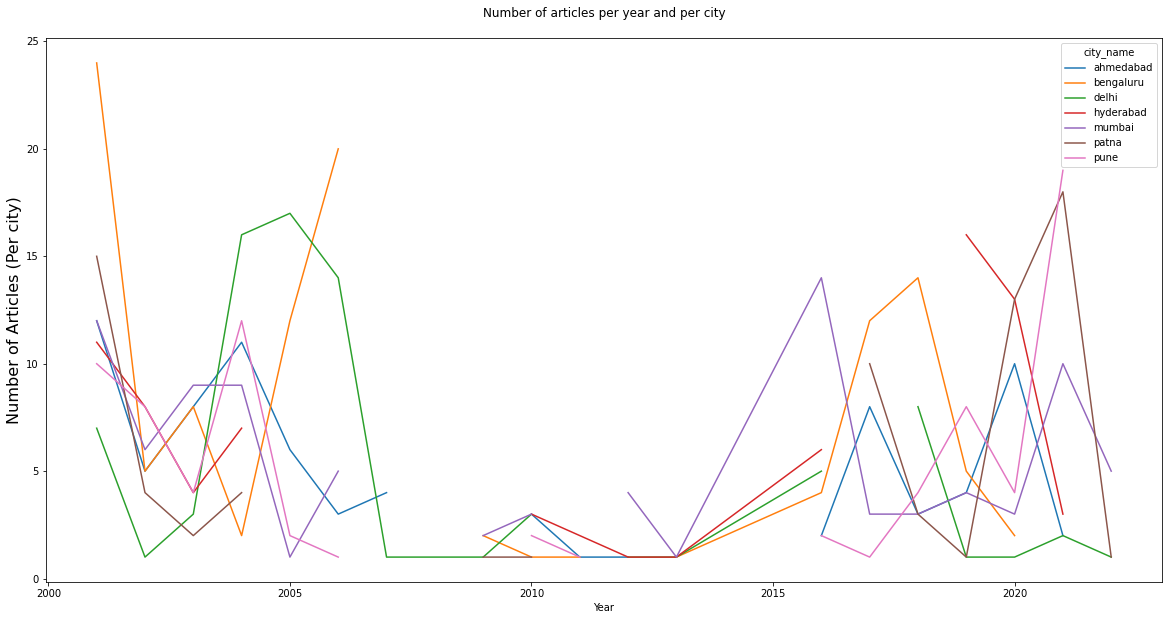

<Figure size 1440x720 with 0 Axes>

In [62]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")

plt.figure(figsize=(20,10))

city_count.plot(ax=a,figsize=(20,10),title="Number of articles per year and per city\n")
a.set_ylabel('Number of Articles (Per city)', size =16)
a.yaxis.tick_left()
a.set_xlabel('Year') 

plt.show()

## Visualising the no. of articles per year

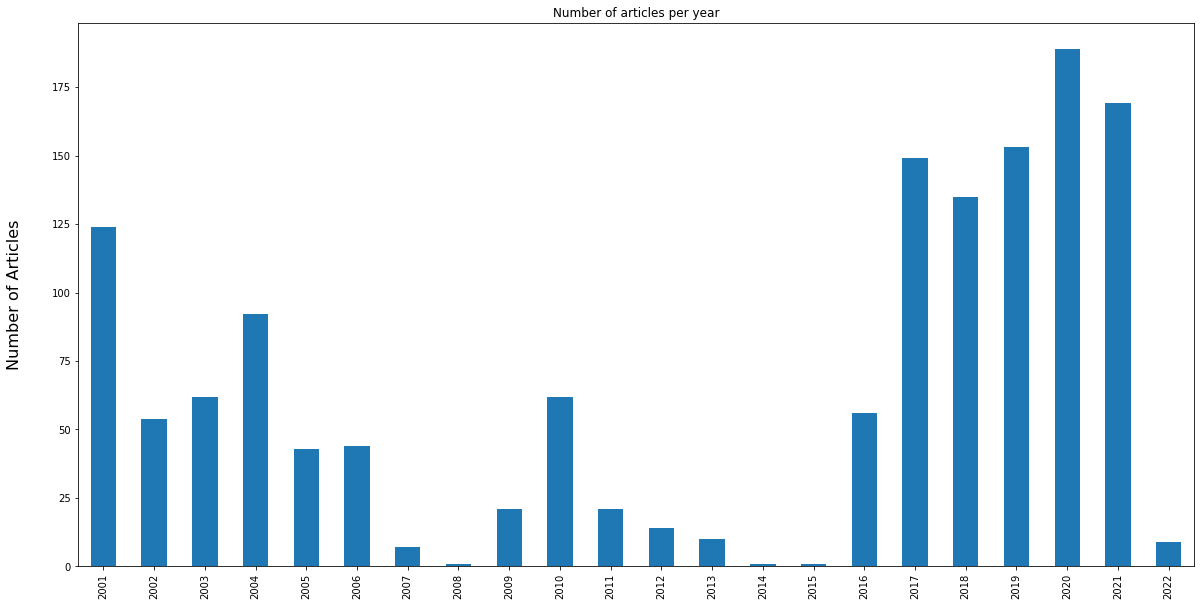

<Figure size 1440x720 with 0 Axes>

In [63]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")

plt.figure(figsize=(20,10))
city_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Number of articles per year")
a.set_ylabel('Number of Articles',size=16)
a.set_xlabel("")
a.get_yaxis().set_label_coords(-.05,0.5)
plt.show()

## Sentiment Analysis of News Headlines

In [64]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [65]:
data['Result'] = np.array([getAnalysis_polarity(headline) for headline in data['headline_text']])


In [66]:
final_result = data.groupby(['Result']).agg({'headline_text':'count'})
final_result

,headline_text
Result,
negative,773
neutral,5113
positive,1831


In [67]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100


print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    23.726837
Name: positive, dtype: float64


Negative Headlines:  headline_text    10.016846
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    66.256317
Name: neutral, dtype: float64


## Overall Sentiment Distribution Pie Chart

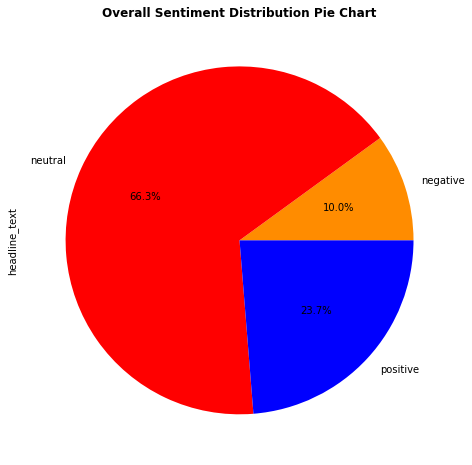

In [68]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%',colors = ['darkorange', 'red','blue'])
plt.title("Overall Sentiment Distribution Pie Chart",fontweight="bold")
plt.show()

# Creating Hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

## Importing the Libraries and the datasets


In [69]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 9.8 MB/s 


In [71]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
stock_data =pd.read_csv('/content/drive/MyDrive/Sparks_Foundation/SENSEX.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-01,26.010000,26.379999,25.860001,25.900000,24.324486,55900
1,2017-03-02,25.830000,25.920000,25.660000,25.770000,24.202393,41800
2,2017-03-03,25.780001,26.070000,25.459999,25.780001,24.211786,70400
3,2017-03-06,25.680000,25.889999,25.440001,25.830000,24.258745,42600
4,2017-03-07,25.700001,25.879999,25.549999,25.840000,24.268139,45600


In [75]:
stock_headlines = pd.read_csv('/content/drive/MyDrive/Sparks_Foundation/india-news-headlines.csv')
stock_headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [76]:
# coverting the column 'Date' to type 'datetime'
stock_headlines['publish_date'] = stock_headlines['publish_date'].astype(str)
stock_headlines['publish_date'] = stock_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date']).dt.normalize()


In [77]:
stock_headlines.rename(columns={'publish_date': 'Date'},inplace = True)
stock_headlines.head()

,Date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


## Creating Hybrid data from Numerical and Textual Data

In [78]:
hybrid_data = pd.concat([stock_data, stock_headlines], axis=1)


In [79]:
hybrid_data.dropna(axis=0, inplace=True)
hybrid_data

,Date,Open,High,Low,Close,Adj Close,Volume,Date,headline_category,headline_text
0,2017-03-01,26.010000,26.379999,25.860001,25.900000,24.324486,55900.0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2017-03-02,25.830000,25.920000,25.660000,25.770000,24.202393,41800.0,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2017-03-03,25.780001,26.070000,25.459999,25.780001,24.211786,70400.0,2001-01-02,unknown,America's unwanted heading for India?
3,2017-03-06,25.680000,25.889999,25.440001,25.830000,24.258745,42600.0,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2017-03-07,25.700001,25.879999,25.549999,25.840000,24.268139,45600.0,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...,...,...,...,...,...,...,...
1253,2022-02-18,49.080002,49.950001,48.669998,49.500000,49.500000,130500.0,2001-02-04,unknown,The final verdict: It touched 8.1 on Richter
1254,2022-02-22,49.080002,50.540001,48.970001,49.490002,49.490002,107200.0,2001-02-04,unknown,Would the Taj; Qutab withstand a quake?
1255,2022-02-23,50.099998,50.320000,49.049999,49.480000,49.480000,125300.0,2001-02-04,unknown,Fab Five: Britain's newest pop sensation
1256,2022-02-24,48.349998,49.709999,47.070000,48.980000,48.980000,189600.0,2001-02-04,unknown,Aftab Shivdasani: Bollywood's bachcha on a roll!


## Sentiment Analysis using TextBlob on the Hybrid Data

In [80]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [81]:
hybrid_data['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_data['headline_text']])
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date,headline_category,headline_text,sentiment
0,2017-03-01,26.010000,26.379999,25.860001,25.900000,24.324486,55900.0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral
1,2017-03-02,25.830000,25.920000,25.660000,25.770000,24.202393,41800.0,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,neutral
2,2017-03-03,25.780001,26.070000,25.459999,25.780001,24.211786,70400.0,2001-01-02,unknown,America's unwanted heading for India?,neutral
3,2017-03-06,25.680000,25.889999,25.440001,25.830000,24.258745,42600.0,2001-01-02,unknown,For bigwigs; it is destination Goa,neutral
4,2017-03-07,25.700001,25.879999,25.549999,25.840000,24.268139,45600.0,2001-01-02,unknown,Extra buses to clear tourist traffic,positive


In [82]:
senti_data = pd.get_dummies(hybrid_data['sentiment'],drop_first=True)

In [83]:
hybrid_data = pd.concat([hybrid_data,senti_data],axis=1)
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date,headline_category,headline_text,sentiment,neutral,positive
0,2017-03-01,26.010000,26.379999,25.860001,25.900000,24.324486,55900.0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral,1,0
1,2017-03-02,25.830000,25.920000,25.660000,25.770000,24.202393,41800.0,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,neutral,1,0
2,2017-03-03,25.780001,26.070000,25.459999,25.780001,24.211786,70400.0,2001-01-02,unknown,America's unwanted heading for India?,neutral,1,0
3,2017-03-06,25.680000,25.889999,25.440001,25.830000,24.258745,42600.0,2001-01-02,unknown,For bigwigs; it is destination Goa,neutral,1,0
4,2017-03-07,25.700001,25.879999,25.549999,25.840000,24.268139,45600.0,2001-01-02,unknown,Extra buses to clear tourist traffic,positive,0,1


## Adding subjectivity and polarity Scores to Textual Data (News Headlines)


In [84]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [85]:
hybrid_data['Subjectivity'] =hybrid_data['headline_text'].apply(getSubjectivity)
hybrid_data['Polarity'] = hybrid_data['headline_text'].apply(getPolarity)
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity
0,2017-03-01,26.010000,26.379999,25.860001,25.900000,24.324486,55900.0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral,1,0,0.000000,0.00
1,2017-03-02,25.830000,25.920000,25.660000,25.770000,24.202393,41800.0,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,neutral,1,0,0.000000,0.00
2,2017-03-03,25.780001,26.070000,25.459999,25.780001,24.211786,70400.0,2001-01-02,unknown,America's unwanted heading for India?,neutral,1,0,0.000000,0.00
3,2017-03-06,25.680000,25.889999,25.440001,25.830000,24.258745,42600.0,2001-01-02,unknown,For bigwigs; it is destination Goa,neutral,1,0,0.000000,0.00
4,2017-03-07,25.700001,25.879999,25.549999,25.840000,24.268139,45600.0,2001-01-02,unknown,Extra buses to clear tourist traffic,positive,0,1,0.241667,0.05


## Visualizing the polarity and Subjectivity scores

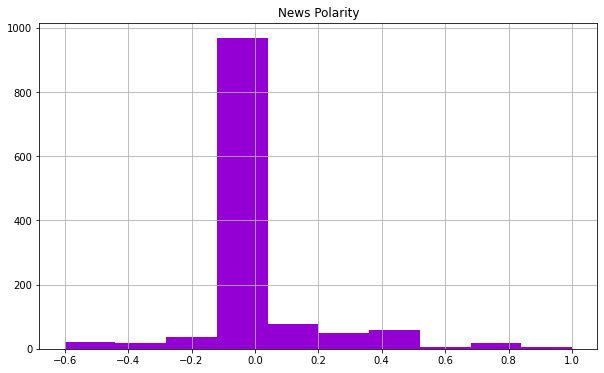

In [86]:
plt.figure(figsize = (10,6))
plt.title('News Polarity')
hybrid_data['Polarity'].hist(color = 'darkviolet')

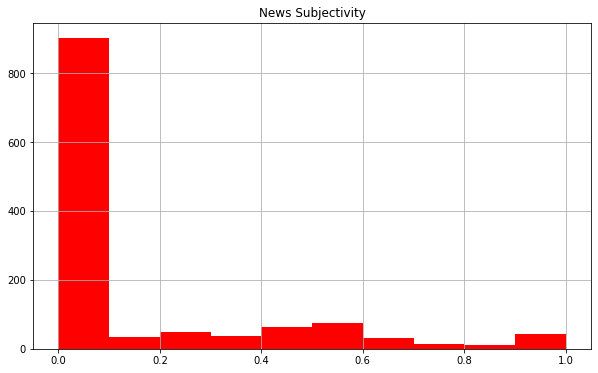

In [87]:
plt.figure(figsize = (10,6))
plt.title('News Subjectivity')
hybrid_data['Subjectivity'].hist(color = 'red')


## Performing Sentiment Analysis over the news Headlines of Hybrid Data

In [88]:
senti_int_an = SentimentIntensityAnalyzer()

hybrid_data['Compound'] = [senti_int_an.polarity_scores(v)['compound'] for v in hybrid_data['headline_text']]
hybrid_data['Negative'] = [senti_int_an.polarity_scores(v)['neg'] for v in hybrid_data['headline_text']]
hybrid_data['Neutral'] = [senti_int_an.polarity_scores(v)['neu'] for v in hybrid_data['headline_text']]
hybrid_data['Positive'] = [senti_int_an.polarity_scores(v)['pos'] for v in hybrid_data['headline_text']]
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2017-03-01,26.010000,26.379999,25.860001,25.900000,24.324486,55900.0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral,1,0,0.000000,0.00,0.2924,0.000,0.805,0.195
1,2017-03-02,25.830000,25.920000,25.660000,25.770000,24.202393,41800.0,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,neutral,1,0,0.000000,0.00,0.0000,0.000,1.000,0.000
2,2017-03-03,25.780001,26.070000,25.459999,25.780001,24.211786,70400.0,2001-01-02,unknown,America's unwanted heading for India?,neutral,1,0,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,2017-03-06,25.680000,25.889999,25.440001,25.830000,24.258745,42600.0,2001-01-02,unknown,For bigwigs; it is destination Goa,neutral,1,0,0.000000,0.00,0.0000,0.000,1.000,0.000
4,2017-03-07,25.700001,25.879999,25.549999,25.840000,24.268139,45600.0,2001-01-02,unknown,Extra buses to clear tourist traffic,positive,0,1,0.241667,0.05,0.3818,0.000,0.658,0.342


In [89]:
hybrid_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date',
       'headline_category', 'headline_text', 'sentiment', 'neutral',
       'positive', 'Subjectivity', 'Polarity', 'Compound', 'Negative',
       'Neutral', 'Positive'],
      dtype='object')

In [90]:
req_col = [ 'Open',  'High', 'Low','Volume','Compound', 'Negative', 'Neutral' ,'Positive','positive']

new_hybrid = hybrid_data[req_col]
new_hybrid.reset_index(inplace = True)

In [91]:
new_hybrid.rename(columns = {'positive':'Label'}, inplace = True)
print(new_hybrid.shape)
new_hybrid.head()

(1258, 10)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,0,26.010000,26.379999,25.860001,55900.0,0.2924,0.000,0.805,0.195,0
1,1,25.830000,25.920000,25.660000,41800.0,0.0000,0.000,1.000,0.000,0
2,2,25.780001,26.070000,25.459999,70400.0,-0.2263,0.322,0.678,0.000,0
3,3,25.680000,25.889999,25.440001,42600.0,0.0000,0.000,1.000,0.000,0
4,4,25.700001,25.879999,25.549999,45600.0,0.3818,0.000,0.658,0.342,1


## Training and Testing the Models for Stock Price/Performance Analysis


In [92]:
X = new_hybrid.drop('Label', axis=1)    

y = new_hybrid['Label']


In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [94]:
np.any(np.isnan(x_train))

False

In [95]:
x_train = x_train.fillna(x_train.mean())

In [96]:
x_test=x_test.fillna(x_test.mean())

### Stock Price/Performance analysis using Logistic Regressor Model

In [97]:
logit = LogisticRegression()
logit.fit(x_train,y_train)
y_logit_pred = logit.predict(x_test)
accuracy_score(y_test,y_logit_pred)


0.8214285714285714

### Stock Price/Performance analysis using Random Forest Model

In [98]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
accuracy_score(y_test,y_rf_pred)

0.8492063492063492

### Stock Price/Performance analysis using Decision Tree Model

In [99]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dt_pred = dt.predict(x_test)
accuracy_score(y_test,y_dt_pred)

0.746031746031746

### Stock Price/Performance analysis using Linear Discriminant Analyser Model

In [100]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_lda_pred = lda.predict(x_test)
accuracy_score(y_test,y_lda_pred)

0.8055555555555556

### Stock Price/Performance analysis using AdaBoost Model

In [101]:
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_adb_pred = adb.predict(x_test)
accuracy_score(y_test,y_adb_pred)

0.8174603174603174

### Stock Price/Performance analysis using Logistic Gradient Boosting Model


In [102]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
accuracy_score(y_test,y_xgb_pred)

0.8055555555555556

# **Conclusion:**
# **From the above calculations of the accuracy of the different models, the accuracy of the Random Forest Model is highest, hence it is the suitable Hybrid model.**